In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay,RocCurveDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC 


data = pd.read_csv('ACCIDENTS3.csv')



In [2]:
#**************************************Convertion de données*********************************************************

#Convertion en numerique
objet = OrdinalEncoder()
numerisation2 = data[["date"]] 
objet.fit_transform(numerisation2)
data["date"] = objet.fit_transform(numerisation2)

numerisation3 = data[["ville"]] 
objet.fit_transform(numerisation3)
data["ville"] = objet.fit_transform(numerisation3)

#********************************************Division base de données********************************************

#Base de données de gravité avec 4 classes, 1OOO instances par classes
data_tue = data[data["descr_grav"]==3.0].iloc[:1000] 
data_lege = data[data["descr_grav"]==1.0].iloc[:1000]
data_severe = data[data["descr_grav"]==0.0].iloc[:1000]
data_indemne = data[data["descr_grav"]==2.0].iloc[:1000]
data = pd.concat([data_tue,data_lege,data_severe,data_indemne])

X = data.drop(["descr_grav"],axis=1)
grav=data['descr_grav']

#Division de la base de données en bases d'apprentissage et base de test
X_train,X_test,grav_train,grav_test = train_test_split(X,grav,test_size=0.2,random_state=42)


data.to_csv('ACCIDENT_4.csv',index=False)


date


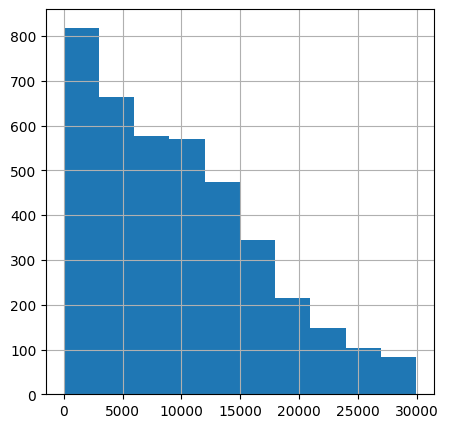

ville


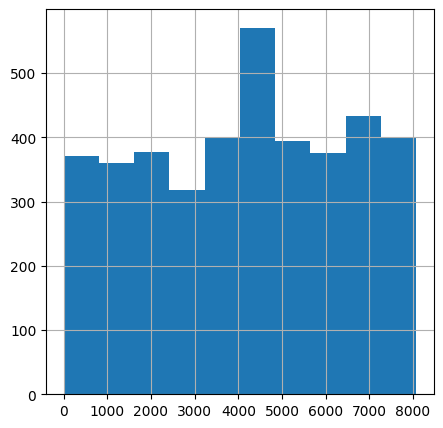

descr_cat_veh


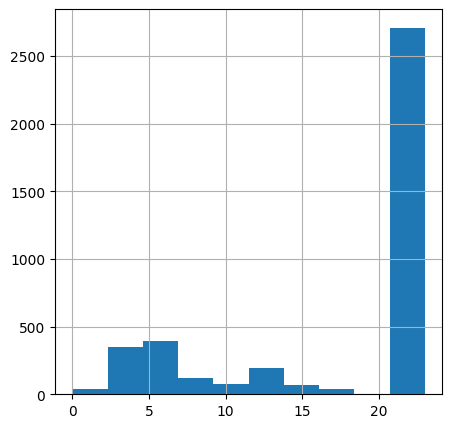

descr_agglo


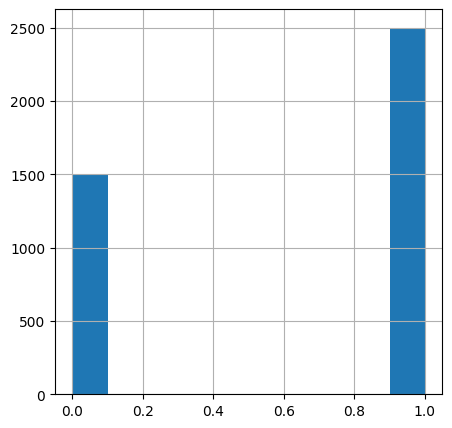

descr_athmo


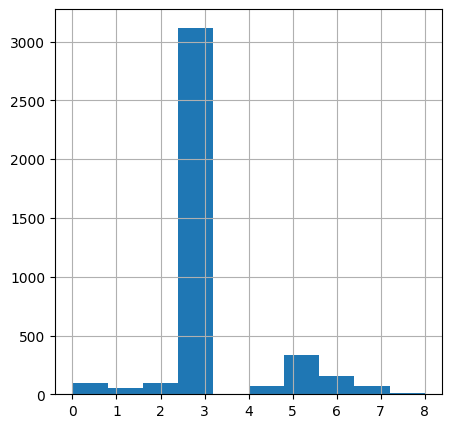

descr_lum


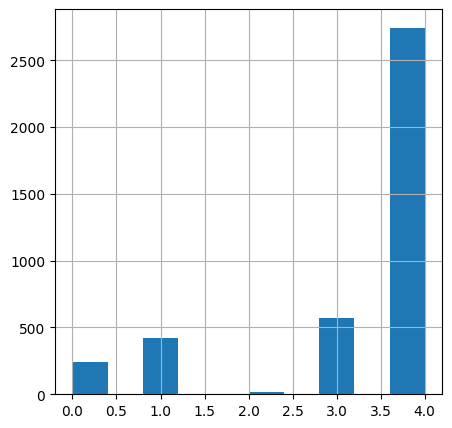

descr_etat_surf


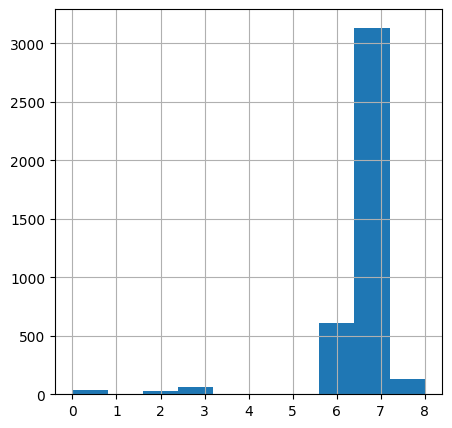

description_intersection


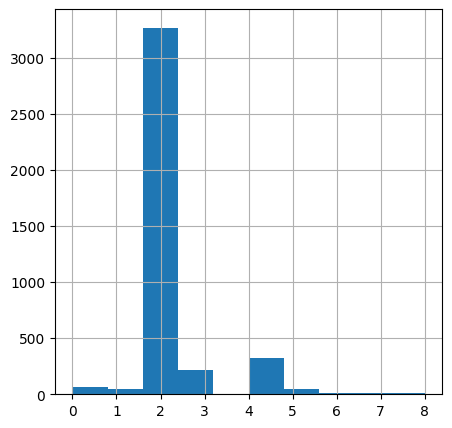

age


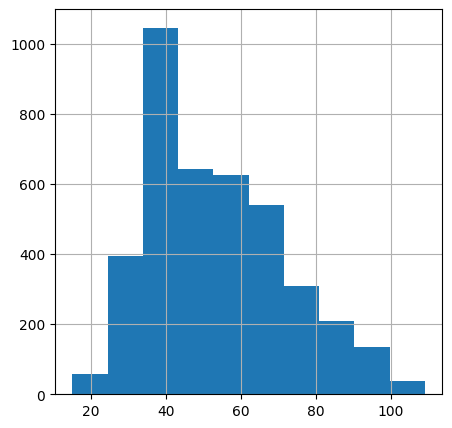

place


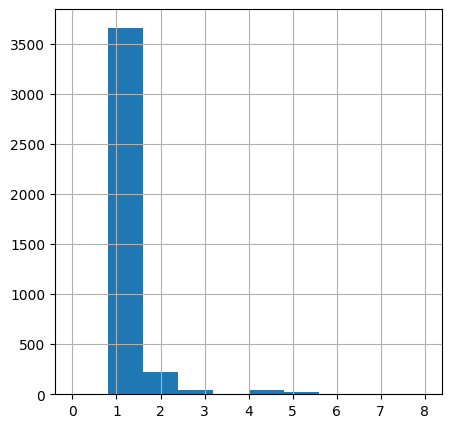

descr_dispo_secu


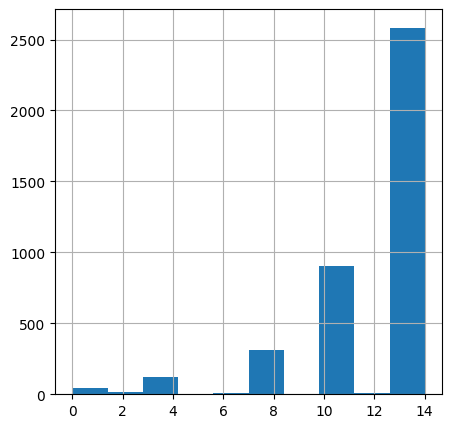

descr_grav


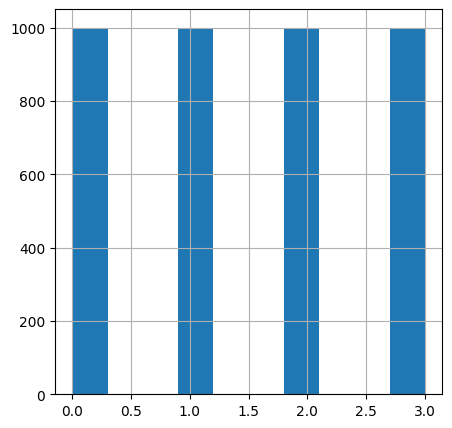

descr_motif_traj


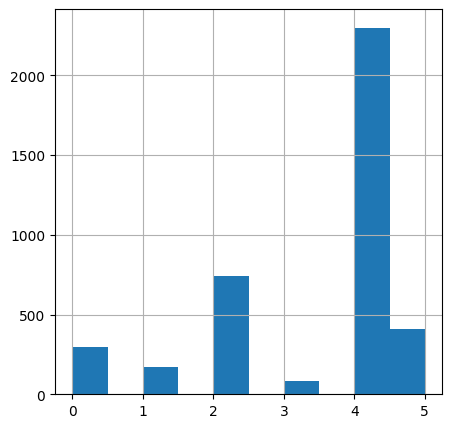

descr_type_col


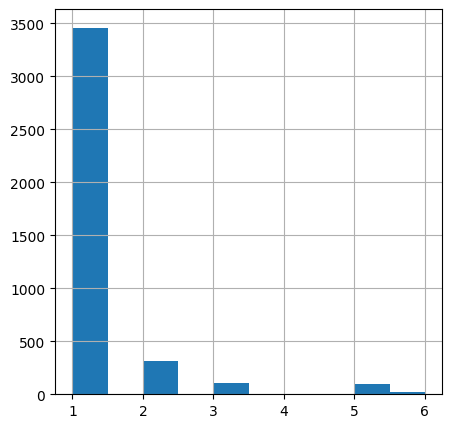

In [3]:
#*****************************************************ETAPE 1*****************************************************************

for categorie in data.keys():
    print(categorie)
    data[categorie].hist(figsize=(5,5))
    plt.show()

Taille des données originales : (4000, 13)
Taille des données réduites : (4000, 2)


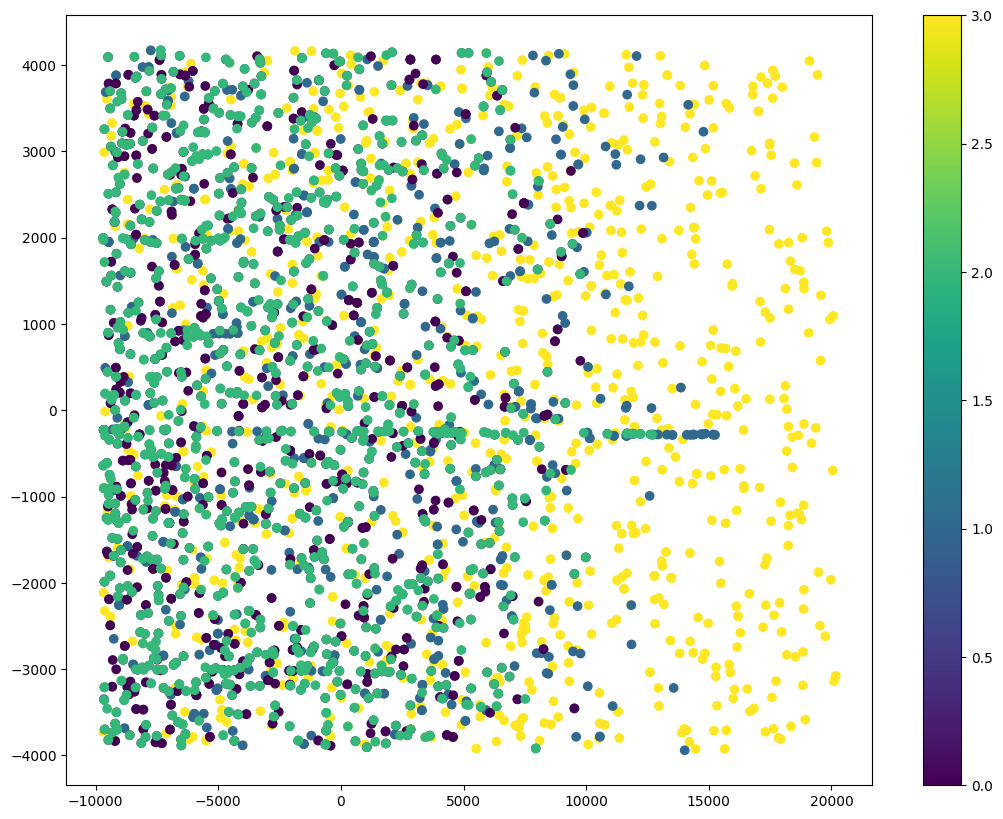

In [4]:
#*****************************************************ETAPE 2*****************************************************************

#Reduction des dimensionnalités méthode PCA
pca = PCA(0.95)
X_PCA_reduit = pca.fit_transform(X)

#taille des données
print(f"Taille des données originales : {X.shape}")
print(f"Taille des données réduites : {X_PCA_reduit.shape}")

#Affichage graphique
plt.figure(figsize=(13,10))
plt.scatter(X_PCA_reduit[:, 0],X_PCA_reduit[:, 1],c=grav)
plt.axis()
plt.colorbar()


In [5]:
#*****************************************************ETAPE 3*****************************************************************

#*************************************************SANS GRIDSEARCH*****************************************************************

# 1---------------Support Vector Machine (SVM)---------------

#SVM object
SVM_object = SVC()

#Application de l'object à la base d'apprentissage
SVM_object.fit(X_train,grav_train)

#Test de l'apprentissage
SVM_object_predict = SVM_object.predict(X_test) 
report_SVM = classification_report(grav_test,SVM_object_predict)
print("report SVM\n"+report_SVM)


# 2---------------Random Forest-----------------
#RandomForest Object
RF_object = RandomForestClassifier()

#Application de l'object à la base d'apprentissage
RF_object.fit(X_train,grav_train)

#Test de l'apprentissage
RF_object_predict = RF_object.predict(X_test) 
report_RF = classification_report(grav_test,RF_object_predict)
print("report RF\n"+report_RF)


# 3---------------Multilayer Perceptron (MLP)---------------

#MLP object
MLP_object = MLPClassifier()

#Application de l'object à la base d'apprentissage
MLP_object.fit(X_train,grav_train)

#Test de l'apprentissage
MLP_object_predict = MLP_object.predict(X_test) 
report_MLP = classification_report(grav_test,MLP_object_predict)
print("report MLP\n"+report_MLP)



report SVM
              precision    recall  f1-score   support

         0.0       0.24      0.11      0.15       194
         1.0       0.40      0.01      0.02       213
         2.0       0.28      0.77      0.41       184
         3.0       0.59      0.57      0.58       209

    accuracy                           0.35       800
   macro avg       0.38      0.36      0.29       800
weighted avg       0.38      0.35      0.29       800

report RF
              precision    recall  f1-score   support

         0.0       0.40      0.45      0.42       194
         1.0       0.46      0.36      0.40       213
         2.0       0.46      0.61      0.52       184
         3.0       0.85      0.69      0.76       209

    accuracy                           0.53       800
   macro avg       0.54      0.53      0.53       800
weighted avg       0.55      0.53      0.53       800

report MLP
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00

In [6]:
#*****************************************************ETAPE 3*****************************************************************

#*************************************************AVEC GRIDSEARCH*****************************************************************

#Prédiction de la gravité d’un accident selon  3 méthodes :
"""
# 1---------------Support Vector Machine (SVM)---------------

#Paramètre pour la méthode Support Vector Machine
param_grid_svm = {'C': [0.1, 1, 10],'kernel': ['linear', 'rbf'],'gamma': [0.001, 0.01, 0.1]}

#SVM object
SVM_object = GridSearchCV(SVC(),param_grid_svm,cv=5)

#Application de l'object à la base d'apprentissage
SVM_object.fit(X_train,grav_train)

#Determiner les paramètres optimaux
param_optimise= SVM_object.best_params_

#Test de l'apprentissage
SVM_object_predict = SVM_object.predict(X_test) 
score_SVM = accuracy_score(grav_test,SVM_object_predict)

print(f"Le score de precision SVM est de  {score_SVM}")
print(f"Les paramètres optimaux sont {param_optimaux}")
"""


# 2---------------Random Forest-----------------

#Paramètre pour la méthode GridSearchCV
param_grid_RF = {'n_estimators' : [100,200,500],'max_depth':[5,10,None],'min_samples_split':[0.1,0.5,0.7]}

#RandomForest Object
RF_object = GridSearchCV(RandomForestClassifier(),param_grid_RF,cv=5)

#Application de l'object à la base d'apprentissage
RF_object.fit(X_train,grav_train)

#Determiner les paramètres optimaux
param_optimaux= RF_object.best_params_

#Test de l'apprentissage
RF_object_predict = RF_object.predict(X_test) 
score_RF = accuracy_score(grav_test,RF_object_predict)

print(f"Le score de precision RF est de {score_RF}")
print(f"Les paramètres optimaux sont {param_optimaux}")
#Le score de précision est de 0.549, ce qui est peu. Le modèle n'est pas précis, mais une fusion avec les autres méthodes 
#permettra d'améliorer la prédiction



# 3---------------Multilayer Perceptron (MLP)---------------


#Paramètre pour la méthode Multilayer Perceptron
param_grid_MLP = {'hidden_layer_sizes' : (100,)} 

#MLP object
MLP_object = GridSearchCV(MLPClassifier(),param_grid_MLP,cv=5)

#Application de l'object à la base d'apprentissage
MLP_object.fit(X_train,grav_train)

#Determiner les paramètres optimaux
param_optimaux= MLP_object.best_params_

#Test de l'apprentissage
MLP_object_predict = MLP_object.predict(X_test) 
score_MLP = accuracy_score(grav_test,MLP_object_predict)

print(f"Le score de precision MLP avec GridSearch est de {score_MLP}")
print(f"Les paramètres optimaux sont {param_optimaux}")




Le score de precision RF est de 0.5375
Les paramètres optimaux sont {'max_depth': 10, 'min_samples_split': 0.1, 'n_estimators': 100}
Le score de precision MLP avec GridSearch est de 0.23125
Les paramètres optimaux sont {'hidden_layer_sizes': 100}


In [66]:
#*****************************************************ETAPE 3*****************************************************************

#----------------------------------------------Vote majoritaire------------------------------------------

"""Pour chaque accident on veut prédire sa gravité, à partir des 3 méthodes appliquées au dessus
On croise les 3 méthodes pour obtenir la prédiction la plus juste"""

liste_methode = [SVM_object.predict(X_test),RF_object.predict(X_test),MLP_object.predict(X_test)]
liste_prediction = [0,0,0,0]

#Chaque méthode prédit un état de gravité
for methode in liste_methode:
    acc_a_predire = 4
    grav= methode[acc_a_predire]
    liste_prediction[int(grav)] += 1;

#Determination de l'état de gravité le plus prédit
if max(liste_prediction) == 1:
    print("La gravité est indeterminée")
else:
    prediction = liste_prediction.index(max(liste_prediction))
    print(f"La gravité de l'accident est {prediction}")


La gravité de l'accident est 3


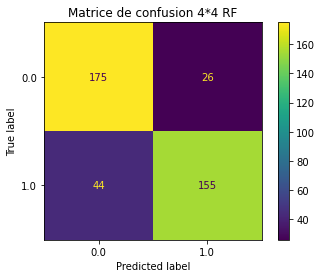

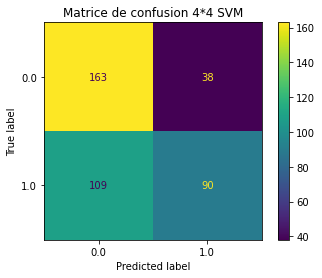

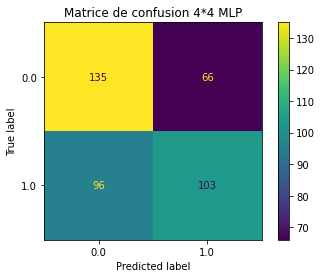

In [16]:
#*****************************************************ETAPE 4*****************************************************************

#----------------------------------------------Matrices de confusion------------------------------------------

dict_methode = {"RF":[RandomForestClassifier()],"SVM":[SVC()],"MLP":[MLPClassifier()]}

for num_methode in dict_methode.keys():
    
    #Application de la méthode
    methode_objet = dict_methode[num_methode][0]
    methode_objet.fit(X_train,grav_train)
    grav_predict = cross_val_predict(methode_objet,X_test,grav_test,cv=3)
    
    #Matrice de confusion
    matrice = confusion_matrix(grav_test, grav_predict)
    
    #Conservation de la matrice dans le dictionnaire
    dict_methode[num_methode].append(matrice)

    #Affichage
    affichage = ConfusionMatrixDisplay(confusion_matrix=matrice, display_labels=methode_objet.classes_)
    affichage.plot()
    plt.title(f"Matrice de confusion 4*4 {num_methode}")
    plt.show()
    





In [13]:
#*******************************FUSION********************************

def fonction(x): 
    if(x==2.0):
        return 0.0
    elif(x==1.0):
        return 0.0
    elif(x==0.0):
        return 1.0
    else:
        return 1.0
data["descr_grav"] = data["descr_grav"].apply(fonction)


#Base de données de gravité avec 4 classes, 1OOO instances par classes
data_tue = data[data["descr_grav"]==3.0].iloc[:1000] 
data_lege = data[data["descr_grav"]==1.0].iloc[:1000]
data_severe = data[data["descr_grav"]==0.0].iloc[:1000]
data_indemne = data[data["descr_grav"]==2.0].iloc[:1000]
data = pd.concat([data_tue,data_lege,data_severe,data_indemne])


X = data.drop(["descr_grav"],axis=1)
grav=data['descr_grav']

#Division de la base de données en bases d'apprentissage et base de test
X_train,X_test,grav_train,grav_test = train_test_split(X,grav,test_size=0.2,random_state=42)

In [14]:
#******************************************************FUSION*****************************************************************


#*****************************************************ETAPE 3*****************************************************************

# 2---------------Random Forest-----------------
#RandomForest Object
RF_object = RandomForestClassifier()

#Application de l'object à la base d'apprentissage
RF_object.fit(X_train,grav_train)

#Test de l'apprentissage
RF_object_predict = RF_object.predict(X_test) 
report_RF = classification_report(grav_test,RF_object_predict)
print("report RF 2 classes sans GridSearch"+report_RF)

#----------------------SVM---------------------
#SVM object
SVM_object = SVC()

#Application de l'object à la base d'apprentissage
SVM_object.fit(X_train,grav_train)

#Test de l'apprentissage
SVM_object_predict = SVM_object.predict(X_test) 
report_SVM = classification_report(grav_test,SVM_object_predict)
print("report SVM 2 classes sans GridSearch"+report_SVM)

# 3---------------Multilayer Perceptron (MLP)---------------


#MLP object
MLP_object = MLPClassifier()

#Application de l'object à la base d'apprentissage
MLP_object.fit(X_train,grav_train)
#Test de l'apprentissage
MLP_object_predict = MLP_object.predict(X_test) 
report_MLP = classification_report(grav_test,MLP_object_predict)
print("report MLP 2 classes sans GridSearch"+report_MLP)

#************************************************AVEC GRID****************************************
"""
# 1---------------Support Vector Machine (SVM)---------------

#Paramètre pour la méthode Support Vector Machine
param_grid_svm = {'C': [0.1, 1, 10],'kernel': ['linear', 'rbf'],'gamma': [0.001, 0.01, 0.1]}

#SVM object
SVM_object = GridSearchCV(SVC(),param_grid_svm,cv=5)

#Application de l'object à la base d'apprentissage
SVM_object.fit(X_train,grav_train)

#Determiner les paramètres optimaux
param_optimaux= SVM_object.best_params_

#Test de l'apprentissage
SVM_object_predict = SVM_object.predict(X_test) 
report_SVM = classification_report(grav_test,SVM_object_predict)
print("report SVM 2 classes avec GridSearch"+report_SVM)
print(f"Les paramètres optimaux sont {param_optimaux}")"""

# 2---------------Random Forest-----------------

#Paramètre pour la méthode GridSearchCV
param_grid_RF = {'n_estimators' : [100,200,500],'max_depth':[5,10,None],'min_samples_split':[0.1,0.5,0.7]}

#RandomForest Object
RF_object = GridSearchCV(RandomForestClassifier(),param_grid_RF,cv=5)

#Application de l'object à la base d'apprentissage
RF_object.fit(X_train,grav_train)

#Determiner les paramètres optimaux
param_optimaux= RF_object.best_params_

#Test de l'apprentissage
RF_object_predict = RF_object.predict(X_test) 
report_RF = classification_report(grav_test,RF_object_predict)
print("report RF 2 classes avec GridSearch"+report_RF)
print(f"Les paramètres optimaux sont {param_optimaux}")

# 3---------------Multilayer Perceptron (MLP)---------------


#Paramètre pour la méthode Multilayer Perceptron
param_grid_MLP = {'hidden_layer_sizes' : (100,)} 

#MLP object
MLP_object = GridSearchCV(MLPClassifier(),param_grid_MLP,cv=5)

#Application de l'object à la base d'apprentissage
MLP_object.fit(X_train,grav_train)

#Determiner les paramètres optimaux
param_optimaux= MLP_object.best_params_

#Test de l'apprentissage
MLP_object_predict = MLP_object.predict(X_test) 
report_MLP = classification_report(grav_test,MLP_object_predict)
print("report MLP 2 classes avec GridSearch"+report_MLP)
print(f"Les paramètres optimaux sont {param_optimaux}")

report RF 2 classes sans GridSearch              precision    recall  f1-score   support

         0.0       0.82      0.90      0.86       201
         1.0       0.88      0.80      0.84       199

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400

report SVM 2 classes sans GridSearch              precision    recall  f1-score   support

         0.0       0.63      0.74      0.68       201
         1.0       0.68      0.56      0.62       199

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.65      0.65      0.65       400

report MLP 2 classes sans GridSearch              precision    recall  f1-score   support

         0.0       0.76      0.18      0.30       201
         1.0       0.53      0.94      0.68       199

    accuracy                           0.56       400
   macro avg       0.

'\n# 1---------------Support Vector Machine (SVM)---------------\n\n#Paramètre pour la méthode Support Vector Machine\nparam_grid_svm = {\'C\': [0.1, 1, 10],\'kernel\': [\'linear\', \'rbf\'],\'gamma\': [0.001, 0.01, 0.1]}\n\n#SVM object\nSVM_object = GridSearchCV(SVC(),param_grid_svm,cv=5)\n\n#Application de l\'object à la base d\'apprentissage\nSVM_object.fit(X_train,grav_train)\n\n#Test de l\'apprentissage\nSVM_object_predict = SVM_object.predict(X_test) \nreport_SVM = classification_report(grav_test,SVM_object_predict)\nprint("report SVM 2 classes avec GridSearch"+report_SVM)\n\n\n# 2---------------Random Forest-----------------\n\n#Paramètre pour la méthode GridSearchCV\nparam_grid_RF = {\'n_estimators\' : [100,200,500],\'max_depth\':[5,10,None],\'min_samples_split\':[0.1,0.5,0.7]}\n\n#RandomForest Object\nRF_object = GridSearchCV(RandomForestClassifier(),param_grid_RF,cv=5)\n\n#Application de l\'object à la base d\'apprentissage\nRF_object.fit(X_train,grav_train)\n\n#Test de l\'ap

In [71]:
#---------------Fusion des 3 méthodes------------------
"""Pour chaque accident on veut prédire sa gravité, à partir des 3 méthodes appliquées au dessus
On croise les 3 méthodes pour obtenir la prédiction la plus juste"""

liste_methode = [SVM_object.predict(X_test),RF_object.predict(X_test),MLP_object.predict(X_test)]
liste_prediction = [0,0,0,0]

#Chaque méthode prédit un état de gravité
for methode in liste_methode:#methode renvoie un int correspondant à l'etat de gravité de l'accident
    acc_a_predire = 1
    grav= methode[acc_a_predire]
    liste_prediction[int(grav)] += 1

#Determination de l'état de gravité le plus prédit
if max(liste_prediction) == 1:
    print("La gravité est indeterminée")
else:
    prediction = liste_prediction.index(max(liste_prediction))
    print(f"La prediction est {prediction}")


La prediction est 2


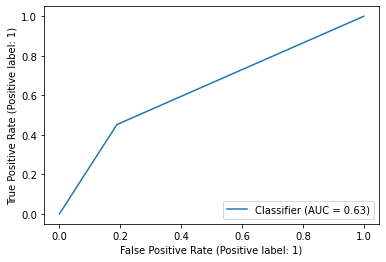

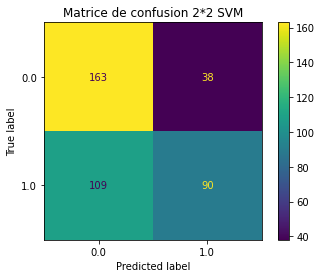

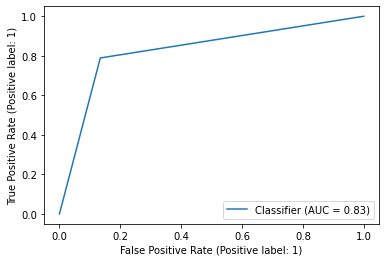

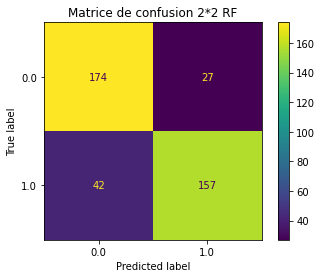

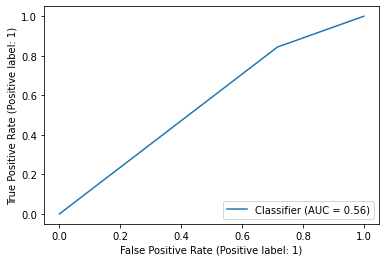

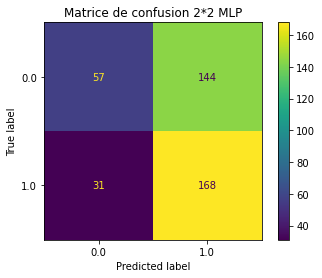

In [17]:
#*****************************************************ETAPE 4*****************************************************************

#------------------------------------Matrices de confusion et courbes ROC------------------------------------------

#---------SVM-------
SVM_object = SVC()
SVM_object.fit(X_train,grav_train)
SVM_object_predict = cross_val_predict(SVM_object,X_test,grav_test,cv=3)

#Courbe ROC
RocCurveDisplay.from_predictions(grav_test,SVM_object_predict)

#Matrice de confusion
matrice_SVM = confusion_matrix(grav_test, SVM_object_predict)
    
#affichage
affichage_SVM = ConfusionMatrixDisplay(confusion_matrix=matrice_SVM, display_labels=SVM_object.classes_)
affichage_SVM.plot()
plt.title(f"Matrice de confusion 2*2 SVM")
plt.show()


#-----------RF-------------
RF_object = RandomForestClassifier()
RF_object.fit(X_train,grav_train)
RF_object_predict = cross_val_predict(RF_object,X_test,grav_test,cv=3) 

#courbe ROC
RocCurveDisplay.from_predictions(grav_test,RF_object_predict)

#Matrice de confusion
matrice_RF = confusion_matrix(grav_test,RF_object_predict)

#affichage
affichage = ConfusionMatrixDisplay(confusion_matrix=matrice_RF, display_labels=RF_object.classes_)
affichage.plot()
plt.title(f"Matrice de confusion 2*2 RF")
plt.show()


#---------MLP-------
#MLP object
MLP_object = MLPClassifier()
MLP_object.fit(X_train,grav_train)
MLP_object_predict =cross_val_predict(MLP_object,X_test,grav_test,cv=3) 

#courbe ROC
RocCurveDisplay.from_predictions(grav_test,MLP_object_predict)

#Matrice de confusion
matrice_MLP = confusion_matrix(grav_test, MLP_object_predict)

#affichage
affichage_MLP = ConfusionMatrixDisplay(confusion_matrix=matrice_MLP, display_labels=MLP_object.classes_)
affichage_MLP.plot()
plt.title(f"Matrice de confusion 2*2 MLP")
plt.show()
